In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

All Data Files (https://collegescorecard.ed.gov/data/)

    Institution-level data files for 1996-97 through 2019-20 containing aggregate data for each institution. Includes information on institutional characteristics, enrollment, student aid, costs, and student outcomes.
    Field of study-level data files for the pooled 2014-15, 2015-16 award years through the pooled 2016-17, 2017-18 award years containing data at the credential level and 4-digit CIP code combination for each institution. Includes information on cumulative debt at graduation and earnings one year after graduation.
    Crosswalk files for 2000-01 through 2018-19 that link the Department’s OPEID with an IPEDS UNITID for each institution.

midpoint was chosen as this means that student performance tends to cluster around the middle of the scale (1000 is the halfway point between the minimum score of 400 and the maximum score of 1600)


In [2]:
entry_scores = pd.read_csv('../my_project_1/data/act_sat_by college_older.csv')


In [3]:
entry_scores.head()

,INSTNM,CITY,STABBR,ZIP,ADM_RATE,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,...,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL
0,Abilene Christian University,Abilene,TX,79699,0.6148,515.0,630.0,500.0,600.0,450.0,...,18.0,26.0,6.0,8.0,25.0,24.0,22.0,7.0,1164.0,1164.0
1,Abraham Baldwin Agricultural College,Tifton,GA,31793-2601,0.7342,470.0,580.0,460.0,540.0,NaN,...,16.0,21.0,NaN,NaN,20.0,19.0,19.0,NaN,1029.0,1029.0
2,Academy of Interactive Entertainment,Seattle,WA,98109-4623,0.9231,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Academy of Interactive Entertainment,Lafayette,LA,70506-4293,0.8627,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adams State University,Alamosa,CO,81101,0.9909,450.0,550.0,440.0,540.0,NaN,...,16.0,22.0,NaN,NaN,20.0,18.0,19.0,NaN,1003.0,1003.0


In [4]:
entry_scores.shape

(6462, 28)

In [5]:
entry_scores.columns

Index(['INSTNM', 'CITY', 'STABBR', 'ZIP', 'ADM_RATE', 'SATVR25', 'SATVR75',
       'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID',
       'SATWRMID', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25',
       'ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID',
       'ACTWRMID', 'SAT_AVG', 'SAT_AVG_ALL'],
      dtype='object')

In [6]:
# columns = ['CITY', 'STABBR', 'ZIP', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID','SATWRMID', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25','ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTENMID', 'ACTMTMID','ACTWRMID', 'SAT_AVG_ALL']

In [7]:
entry_scores = entry_scores.drop(columns = ['CITY', 'STABBR', 'ZIP', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID','SATWRMID', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25','ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTENMID', 'ACTMTMID','ACTWRMID', 'SAT_AVG_ALL'])

In [8]:
# ADM_RATE - admission rate
# SAT_AVG - average SAT score of students admitted
# ACTCMMID - midpoint of the ACT cumulative score

In [9]:
entry_scores.rename(columns={
                    'INSTNM': 'college',
                    'ADM_RATE': 'admissions',
                    'ACTCMMID' : 'act_mid',
                    'SAT_AVG' : 'sat_ave',
}, inplace = True)

In [10]:
entry_scores.head()

,college,admissions,act_mid,sat_ave
0,Abilene Christian University,0.6148,25.0,1164.0
1,Abraham Baldwin Agricultural College,0.7342,20.0,1029.0
2,Academy of Interactive Entertainment,0.9231,NaN,NaN
3,Academy of Interactive Entertainment,0.8627,NaN,NaN
4,Adams State University,0.9909,20.0,1003.0


In [11]:
pd.isnull(entry_scores).sum()

college          0
admissions    4483
act_mid       5210
sat_ave       5184
dtype: int64

In [12]:
entry_scores = entry_scores[entry_scores['act_mid'].notna()]
entry_scores = entry_scores[entry_scores['sat_ave'].notna()]
entry_scores = entry_scores[entry_scores['admissions'].notna()]
# entry_scores.dropna(['act_mid','sat_ave'], inplace=True)

In [13]:
pd.isnull(entry_scores).sum()

college       0
admissions    0
act_mid       0
sat_ave       0
dtype: int64

In [14]:
entry_scores.shape

(1251, 4)

In [15]:
entry_scores.head(10)

,college,admissions,act_mid,sat_ave
0,Abilene Christian University,0.6148,25.0,1164.0
1,Abraham Baldwin Agricultural College,0.7342,20.0,1029.0
4,Adams State University,0.9909,20.0,1003.0
5,Adelphi University,0.7430,24.0,1161.0
6,Adrian College,0.5593,22.0,1046.0
9,AdventHealth University,0.5053,20.0,1072.0
11,Alabama A & M University,0.9175,17.0,939.0
12,Alabama State University,0.9690,17.0,946.0
14,Albany College of Pharmacy and Health Sciences,0.7107,26.0,1242.0
15,Albany State University,0.6568,16.0,849.0


In [16]:
entry_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 6453
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   college     1251 non-null   object 
 1   admissions  1251 non-null   float64
 2   act_mid     1251 non-null   float64
 3   sat_ave     1251 non-null   float64
dtypes: float64(3), object(1)
memory usage: 48.9+ KB


In [17]:
gpa_scores = pd.read_excel('../my_project_1/data/college_GPA.xlsx')

In [18]:
gpa_scores.columns

Index(['College', 'Acceptance Rate', 'Average GPA', 'year'], dtype='object')

In [19]:
gpa_scores = gpa_scores.drop(columns=['Acceptance Rate', 'year'])
gpa_scores.head()

,College,Average GPA
0,Adelphi University,3.22
1,Albion College,3.29
2,Allegheny College,3.04
3,Amherst College,3.48
4,Appalachian State University,3.10


In [20]:
gpa_scores.rename(columns={
                    'College': 'college',
                    'Average GPA' : 'ave_gpa'}, inplace = True)

In [21]:
gpa_scores.head()

,college,ave_gpa
0,Adelphi University,3.22
1,Albion College,3.29
2,Allegheny College,3.04
3,Amherst College,3.48
4,Appalachian State University,3.10


In [22]:
college_merged = pd.merge(entry_scores, gpa_scores, on='college')

In [23]:
college_merged.head(10)

,college,admissions,act_mid,sat_ave,ave_gpa
0,Adelphi University,0.7430,24.0,1161.0,3.22
1,Albion College,0.6876,24.0,1118.0,3.29
2,Allegheny College,0.6215,27.0,1272.0,3.04
3,Amherst College,0.1131,32.0,1431.0,3.48
4,Appalachian State University,0.7681,25.0,1202.0,3.10
5,Ashland University,0.7117,22.0,1104.0,3.14
6,Auburn University,0.8067,28.0,1300.0,3.03
7,Baylor University,0.4533,29.0,1318.0,3.10
8,Boston College,0.2722,33.0,1437.0,3.35
9,Bradley University,0.7021,25.0,1191.0,3.17


In [24]:
college_merged.shape

(70, 5)

Text(0, 0.5, 'Average college GPA')

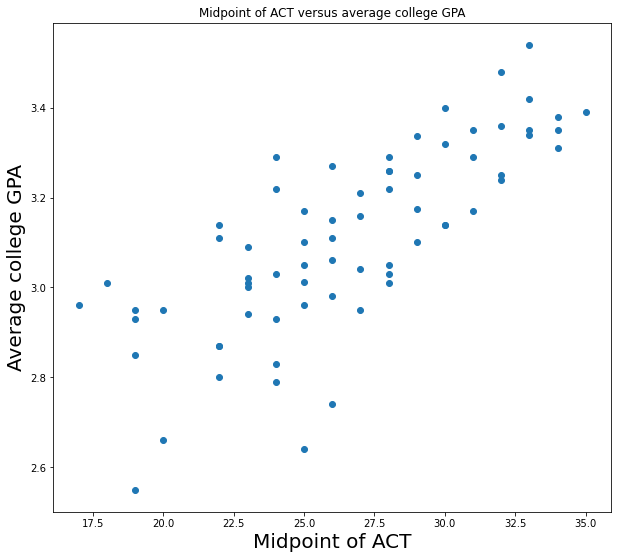

In [25]:
# Establish the size of the figure.
plt.figure(figsize = (10, 9))

# Create scatterplot of ACT versus GPA.
plt.scatter(college_merged['act_mid'],
            college_merged['ave_gpa']);

plt.title("Midpoint of ACT versus average college GPA")
plt.xlabel("Midpoint of ACT", fontsize = 20);
plt.ylabel("Average college GPA", fontsize = 20)

In [26]:
# Create a linear regression over the data 
# Polyfit in numpy does a least squares polynomial fit over the given data.
# The final parameter is the degree of the polynomial. For linear regression the degree is 1.
d = np.polyfit(college_merged['sat_ave'],college_merged['ave_gpa'],1)
f = np.poly1d(d)
# this is inserted in column 4
college_merged.insert(4,'line_sat',f(college_merged['sat_ave']))  

Text(0, 0.5, 'Average college GPA')

<Figure size 1080x1080 with 0 Axes>

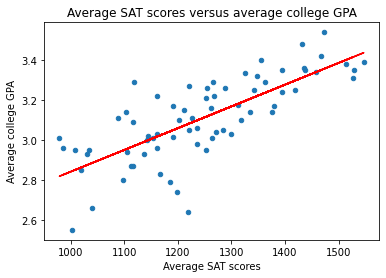

In [27]:
# Establish the size of the figure.
plt.figure(figsize = (15, 15))

# Create scatterplot and line of ACT versus GPA.
ax=college_merged.plot.scatter(x='sat_ave',y='ave_gpa')
college_merged.plot(x='sat_ave',y='line_sat', color='red', legend=False, ax=ax )

plt.title("Average SAT scores versus average college GPA")
plt.xlabel("Average SAT scores", fontsize = 10);
plt.ylabel("Average college GPA", fontsize = 10)

In [28]:
# Create a linear regression over the data 
# Polyfit in numpy does a least squares polynomial fit over the given data.
# The final parameter is the degree of the polynomial. For linear regression the degree is 1.
d = np.polyfit(college_merged['act_mid'],college_merged['ave_gpa'],1)
f = np.poly1d(d)
# this is inserted in column 5
college_merged.insert(5,'line_act',f(college_merged['act_mid'])) 

Text(0, 0.5, 'Average college GPA')

<Figure size 1080x1080 with 0 Axes>

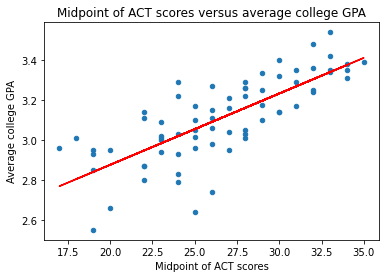

In [29]:
# Establish the size of the figure.
plt.figure(figsize = (15, 15))

# Create scatterplot and line of ACT versus GPA.
ax=college_merged.plot.scatter(x='act_mid',y='ave_gpa')
college_merged.plot(x='act_mid',y='line_act', color='red', legend=False, ax=ax )

plt.title("Midpoint of ACT scores versus average college GPA")
plt.xlabel("Midpoint of ACT scores", fontsize = 10);
plt.ylabel("Average college GPA", fontsize = 10)

In [30]:
# # plt.matshow(college_merged.corr())
# f = plt.figure(figsize=(10, 10))
# plt.matshow(college_merged.corr(), fignum=f.number)
# # plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# # plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

<AxesSubplot:>

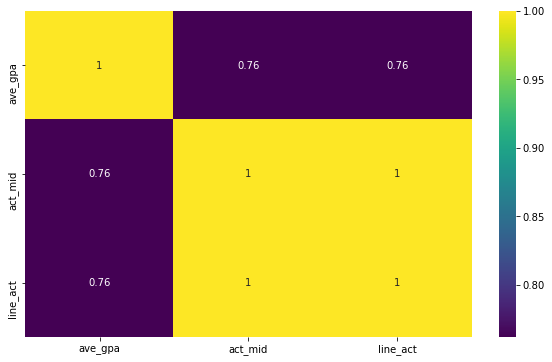

In [31]:
#Quality correlation matrix
k = 3 #number of variables for heatmap
cols = college_merged.corr().nlargest(k, 'ave_gpa')['ave_gpa'].index
cm = college_merged[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')



<AxesSubplot:>

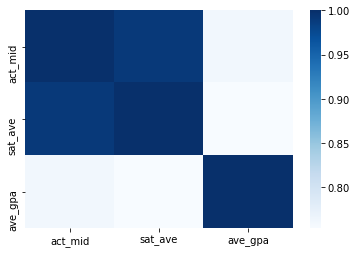

In [32]:
college_merged = college_merged.drop(columns=['admissions','line_sat','line_act'])
plt.figure(figsize=(6,4))
sns.heatmap(college_merged.corr(),cmap='Blues',annot=False) 